In [4]:
import pandas as pd

df = pd.read_csv("boston_housing.csv")
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

step 1: Load the training csv

In [8]:
csv_path = "/content/boston_housing.csv"
df = pd.read_csv(csv_path)
print(df.head())
print(df.info())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    

step 2: Exploratory Data Analysis(EDA)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

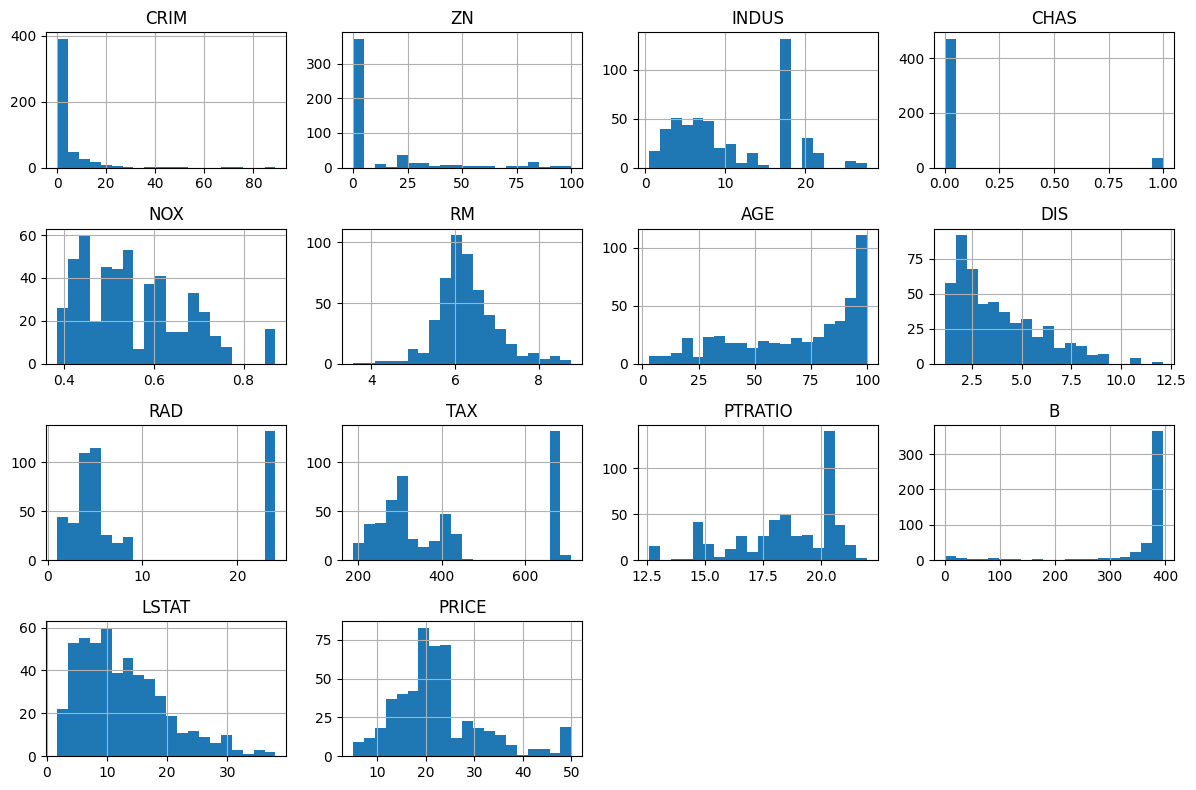

In [9]:
print(df.describe())
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

Correlation heatmap

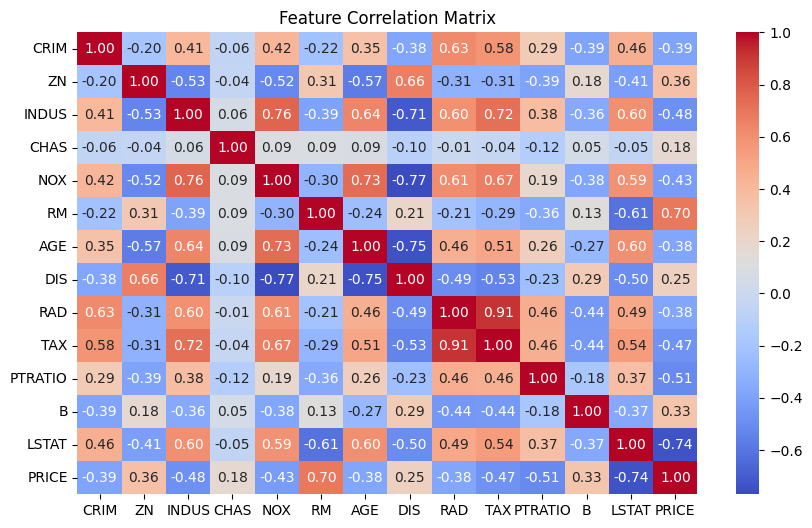

In [10]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

Step 3: Prepare data for modeling
Features and target

In [11]:
X = df.drop(columns=["PRICE"])
y = df["PRICE"]

Split into train/test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Scale features

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

Step 4: Train the model

In [14]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Step 5: Evaluate

In [15]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 24.29
R² Score: 0.67


Plot Actual vs Predicted

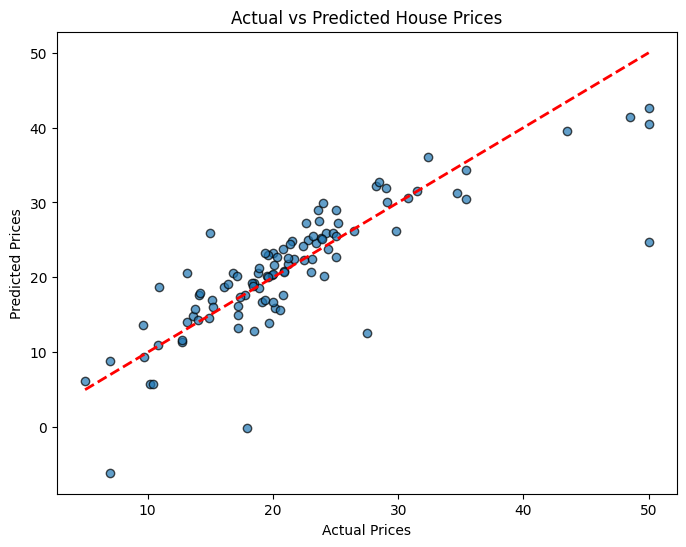

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

**1. Feature Engineering**

**Polynomial Features**

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

Split and scale

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train model

In [19]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("R² with Polynomial Features:", r2_score(y_test, y_pred))

R² with Polynomial Features: 0.8055829447972163


**Model Comparison**

*a. Random Forest Regressor*

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))

Random Forest R²: 0.886241862766177


*b. Support Vector Regressor (SVR)*

In [21]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

print("SVR R²:", r2_score(y_test, y_pred_svr))

SVR R²: 0.5821386500665275


*c. Gradient Boosting Regressor*

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("Gradient Boosting R²:", r2_score(y_test, y_pred_gbr))


Gradient Boosting R²: 0.8909405778571593


**3. Model Evaluation and Comparison**

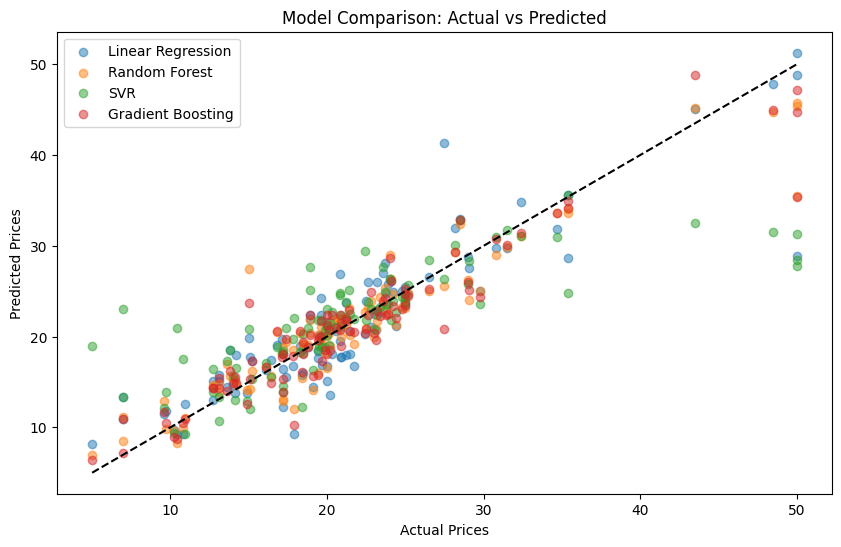

In [23]:
models = {
    "Linear Regression": y_pred,
    "Random Forest": y_pred_rf,
    "SVR": y_pred_svr,
    "Gradient Boosting": y_pred_gbr
}

plt.figure(figsize=(10, 6))
for name, pred in models.items():
    plt.scatter(y_test, pred, label=name, alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.title("Model Comparison: Actual vs Predicted")
plt.show()



---


---





# Project: Breast Cancer Classification (Malignant vs Benign)

**Step 1: Import Libraries**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


**Step 2: Load Dataset from CSV**

In [28]:
# Load from CSV
df = pd.read_csv("breast_cancer_data.csv")

# Preview
print(df.head())
print(df['target'].value_counts())  # 0 = malignant, 1 = benign


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

**Step 3: Exploratory Data Analysis (EDA)**

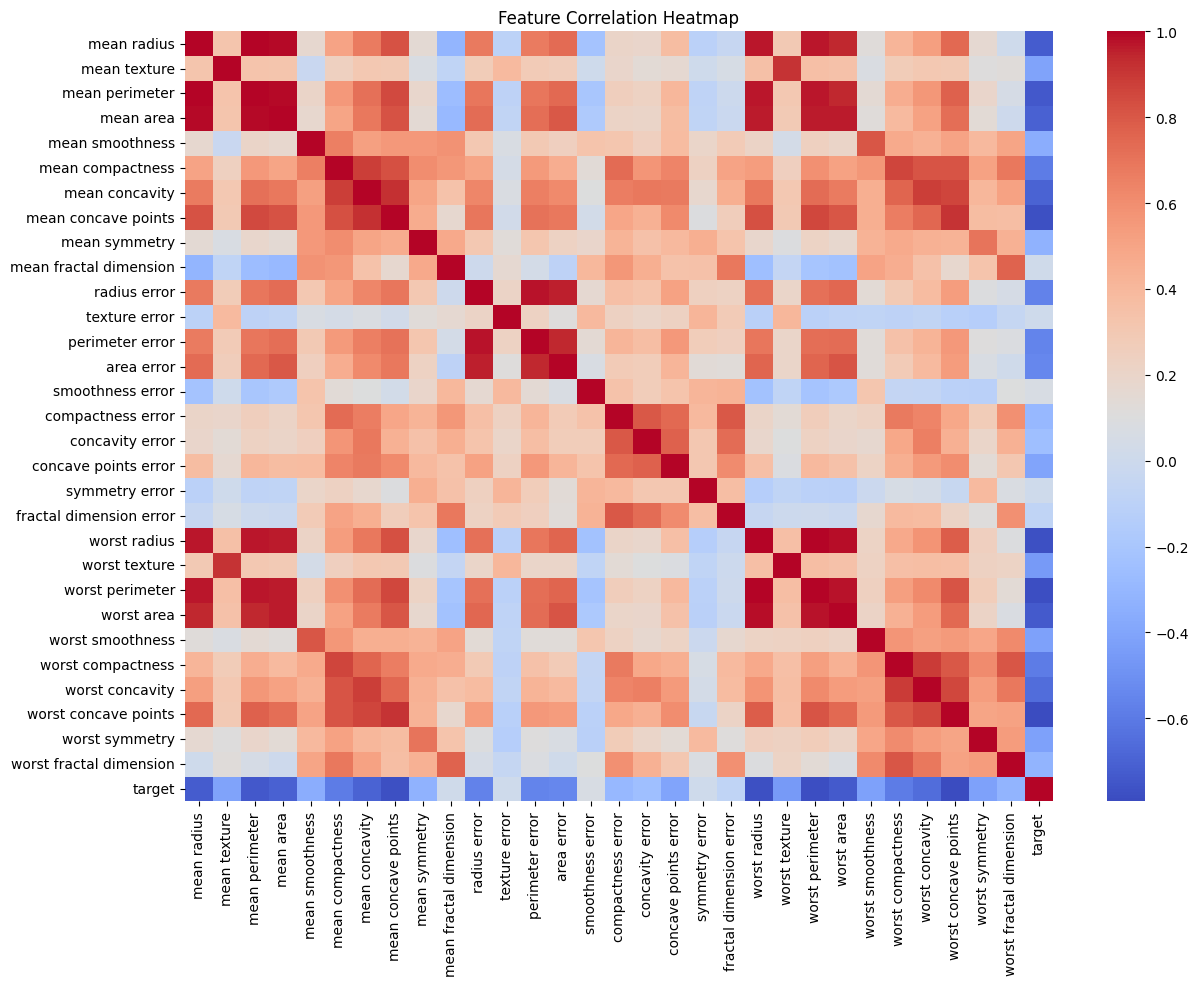

In [29]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='coolwarm', cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()


**Step 4: Prepare Data**

In [30]:
# Features and label
X = df.drop("target", axis=1)
y = df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Step 5: Train Random Forest Classifier**

In [31]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

**Step 6: Evaluate the Model**

Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



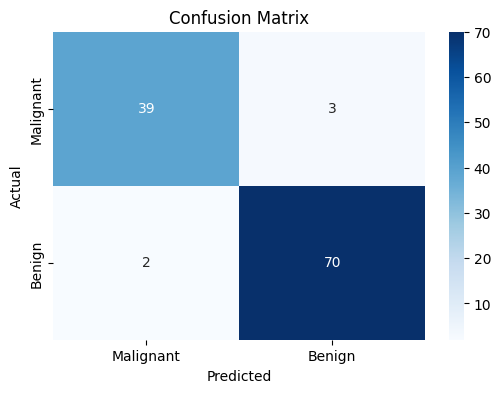

In [32]:
# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'], cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Comparision with other classifiers(SVM,Logistic Regression,etc...)

**Step 1: Import Required Libraries**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

**Step 2: Load and Prepare Data**

In [34]:
# Load CSV
df = pd.read_csv("breast_cancer_data.csv")

# Split features and labels
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Step 3: Train and Evaluate Multiple Models**

In [35]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name}:\nAccuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=["Malignant", "Benign"]))



Logistic Regression:
Accuracy: 0.9825
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


SVM:
Accuracy: 0.9825
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Random Forest:
Accuracy: 0.9561
              precision    recall  f1-score   support

   Malignant       0.95      0.93      0.94        42
      Benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95

**Step 4: Visualize Accuracy Comparison**

<ipython-input-36-dfdfb836c7b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.values()), y=list(results.keys()), palette="viridis")


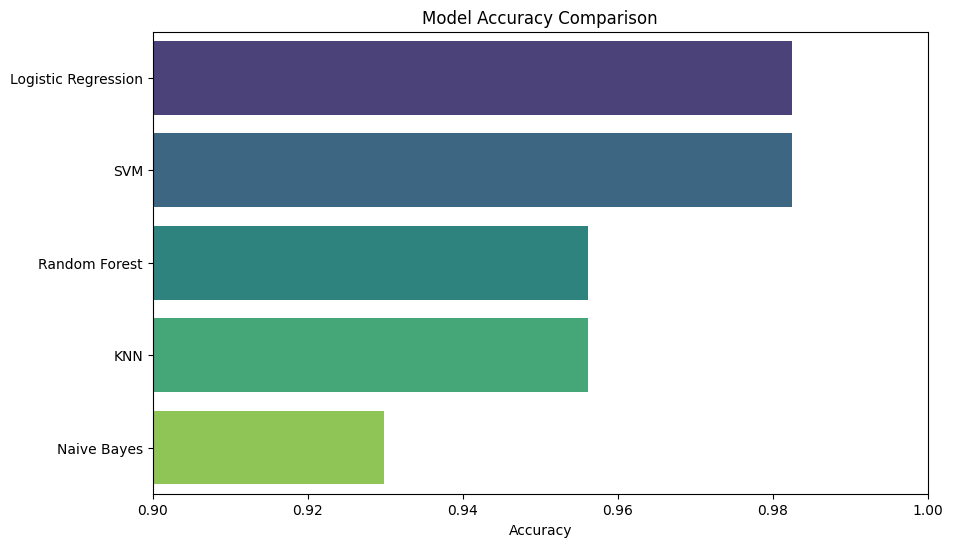

In [36]:
# Plot model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.values()), y=list(results.keys()), palette="viridis")
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0.9, 1.0)
plt.show()


*Summary :*

1)Logistic Regression and SVM usually perform the best.

2)Random Forest is slightly behind but more interpretable.

3)KNN and Naive Bayes are simpler but less accurate here.



---

